# The goal of this file is to create filtered data sets that would have different sentiment means by day: depending on the different charecteristics like: 
 * views count 
 * time published
 * type of classification of the text: Crude Oil, Green Energy or Other. 

In [235]:
import pandas as pd

# Read the CSV files
data = pd.read_csv('Merged NYT & X (>2000) views/Merged NYT & X (>2000) views.csv')

data[data['date'] == '2024-01-04'].head(10)


,date,negative_sentiment_score,neutral_sentiment_score,positive_sentiment_score,compound_sentiment_score,classification,date_and_time,text,by,source
11,2024-01-04,0.436688,0.504969,0.058343,-0.378346,Other,2024-01-04 13:03:04+00:00,#TodayInEnergy - U.S. #HenryHub #naturalgasprices in 2023 were the lowest since mid-2020 https://t.co/EGSbAKi2jP https://t.co/rObAaluhMQ,EIA,X
12,2024-01-04,0.056669,0.918717,0.024614,-0.032055,Other,2024-01-04 15:32:07+00:00,"#NaturalGasStorage Report with data for week ending December 29, 2023 posted at https://t.co/3ZOKPCS6U6 https://t.co/dohJoFDkzn",EIA,X
13,2024-01-04,0.066983,0.898684,0.034333,-0.032650,Crude Oil,2024-01-04 16:09:18+00:00,"#WeeklyPetroleumStatusReport with data for #oil, #gasoline, #distillate, #jetfuel, #ethanol, and more for week ending 12/29/2023 posted at https://t.co/FXmPTNxKCs",EIA,X
14,2024-01-04,0.012017,0.507276,0.480707,0.468689,Other,2024-01-04 18:12:07+00:00,Want to keep up with our latest data releases? Opt in to our email lists to make sure you don't miss anything!\n\n📧 https://t.co/EdgjkV67wU https://t.co/ciMFqoJ9Rr,EIA,X
15,2024-01-04,0.010533,0.590875,0.398592,0.388059,Other,2024-01-04 18:39:01+00:00,"Changes to #TodayInEnergy are coming on Monday.\n\nToday In Energy will remain a critical source for energy analysis, and it will now be the home for several of our other analysis products. \n\nWhat's changing? Check it out on our website 👇\nhttps://t.co/4ONwfWc9ee",EIA,X


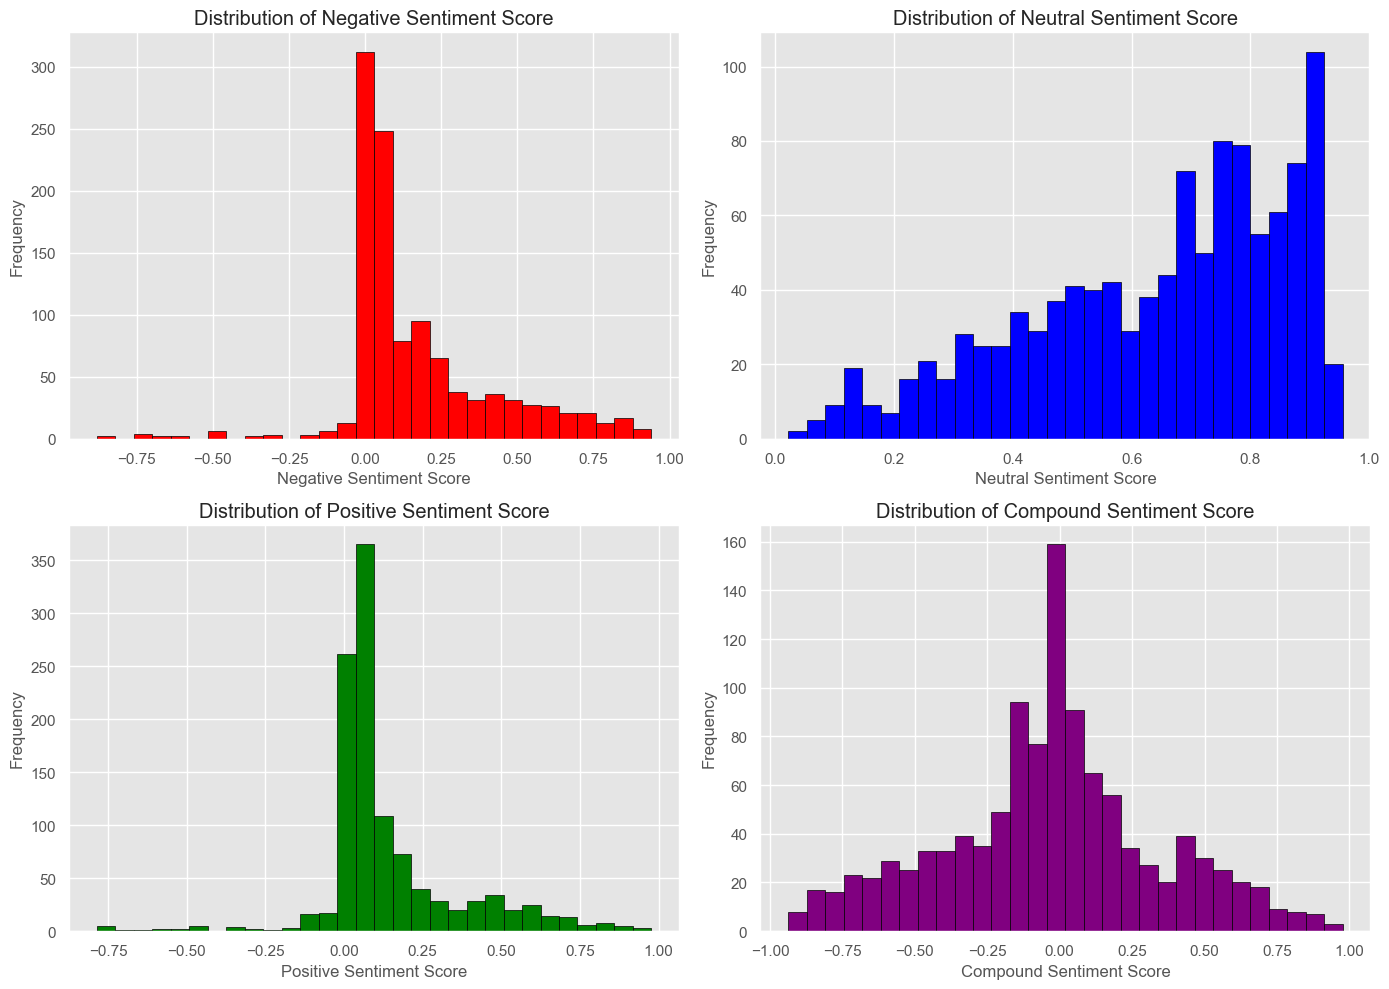

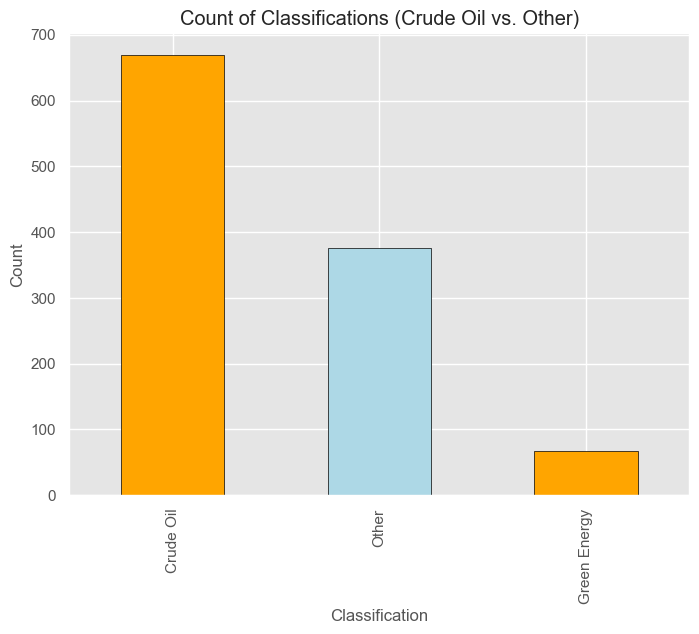

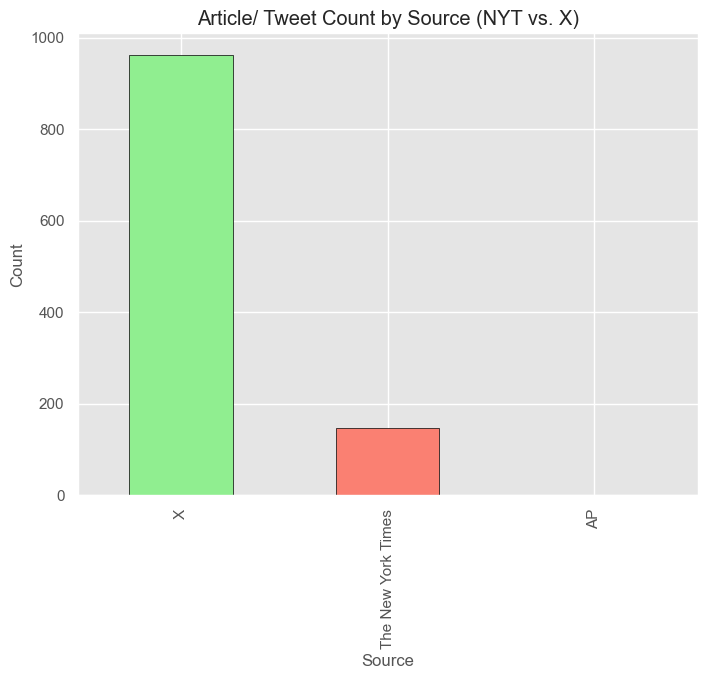

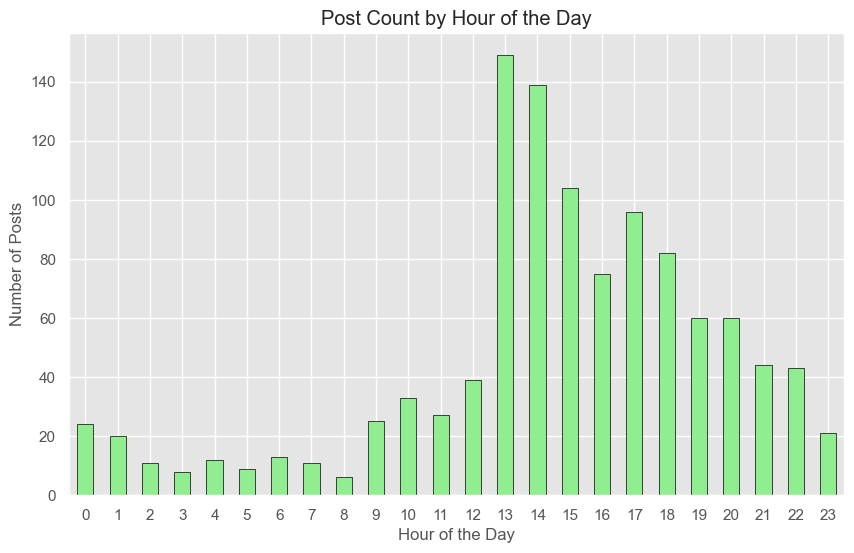

In [236]:
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.style.use('ggplot')

# 1. Distribution of Sentiment Scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

data['negative_sentiment_score'].hist(ax=axes[0, 0], bins=30, color='red', edgecolor='black')
axes[0, 0].set_title('Distribution of Negative Sentiment Score')
axes[0, 0].set_xlabel('Negative Sentiment Score')
axes[0, 0].set_ylabel('Frequency')

data['neutral_sentiment_score'].hist(ax=axes[0, 1], bins=30, color='blue', edgecolor='black')
axes[0, 1].set_title('Distribution of Neutral Sentiment Score')
axes[0, 1].set_xlabel('Neutral Sentiment Score')
axes[0, 1].set_ylabel('Frequency')

data['positive_sentiment_score'].hist(ax=axes[1, 0], bins=30, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution of Positive Sentiment Score')
axes[1, 0].set_xlabel('Positive Sentiment Score')
axes[1, 0].set_ylabel('Frequency')

data['compound_sentiment_score'].hist(ax=axes[1, 1], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Distribution of Compound Sentiment Score')
axes[1, 1].set_xlabel('Compound Sentiment Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Count of Classifications (Crude Oil vs. Other)
plt.figure(figsize=(8, 6))
data['classification'].value_counts().plot(kind='bar', color=['orange', 'lightblue'], edgecolor='black')
plt.title('Count of Classifications (Crude Oil vs. Other)')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

# 3. Article/ Tweet Count by Source (NYT vs. X)
plt.figure(figsize=(8, 6))
data['source'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Article/ Tweet Count by Source (NYT vs. X)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

# Convert 'date_and_time' column to datetime format if not already
data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

# Extract hour and minute from the 'date_and_time' column
# data['hour'] = data['date_and_time'].dt.hour


# 1. Post count by Hour of the Day
plt.figure(figsize=(10, 6))
data['date_and_time'].dt.hour.value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Post Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [237]:
# import pandas as pd

# # Ensure the 'date_and_time' column is in datetime format
# data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

# # Create a new column to extract time
# data['time'] = data['date_and_time'].dt.time

# # Create a new column to extract just the date
# data['date'] = data['date_and_time'].dt.date

# # 1. Group by date to calculate the mean of the compound sentiment score
# mean_compound_per_day = data.groupby('date')['compound_sentiment_score'].mean()

# # 2. Filter by specific classifications (e.g., 'Crude Oil', 'Green Energy')
# filtered_data_classification = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]
# mean_compound_CrudeOil_GreenEnergy = filtered_data_classification.groupby('date')['compound_sentiment_score'].mean()

# # 3. Filter by posts created before 9:30 AM
# filtered_data_before_930am = data[(data['date_and_time'].dt.hour < 9) | ((data['date_and_time'].dt.hour == 9) & (data['date_and_time'].dt.minute < 30))]
# mean_compound_before_930am = filtered_data_before_930am.groupby('date')['compound_sentiment_score'].mean()

# # 4. Mean during trading hours

# # Filter based on classification 'Crude Oil' and 'Green Energy'
# filtered_data = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]

# # Define trading hours (9:30 AM to 4:00 PM)
# trading_start = pd.Timestamp('09:30:00').time()
# trading_end = pd.Timestamp('16:00:00').time()

# # Filter the data within the trading hours
# trading_hours_data = filtered_data[(filtered_data['date_and_time'].dt.time >= trading_start) & 
#                                    (filtered_data['date_and_time'].dt.time <= trading_end)]

# # Calculate the mean compound sentiment score by day during trading hours
# mean_sentiment_by_day_trading_hours = trading_hours_data.groupby(trading_hours_data['date_and_time'].dt.date)['compound_sentiment_score'].mean().reset_index()



# # 5. mean after 4:00 PM and before 9:30 AM with Crude Oil and Green Energy
# # Step 1: Filter for "Crude Oil" and "Green Energy"
# filtered_data = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]

# # Convert date_and_time to datetime again just in case
# filtered_data['date_and_time'] = pd.to_datetime(filtered_data['date_and_time'])

# # Initialize an empty list to store results
# mean_sentiment_for_next_day = []

# # Loop through each unique date in the dataset
# unique_dates = sorted(filtered_data['date_and_time'].dt.date.unique())

# for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
#     current_day = unique_dates[i]
#     previous_day = unique_dates[i - 1]

#     # Filter for the previous day after 4:00 PM
#     prev_day_after_4pm = filtered_data[
#         (filtered_data['date_and_time'].dt.date == previous_day) &
#         (filtered_data['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
#     ]

#     # Filter for the current day before 9:30 AM
#     current_day_before_930am = filtered_data[
#         (filtered_data['date_and_time'].dt.date == current_day) &
#         (filtered_data['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
#     ]

#     # Combine the two filtered sets of data
#     combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

#     # Calculate the mean compound sentiment score if there's any data for this combined period
#     if not combined_data.empty:
#         mean_score = combined_data['compound_sentiment_score'].mean()
#         mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_sentiment': mean_score})

# # Convert the results into a DataFrame
# mean_sentiment_for_next_day = pd.DataFrame(mean_sentiment_for_next_day)





# # Display results
# print("\nMean Compound Sentiment Score Per Day:")
# print(mean_compound_per_day)

# print("\nMean Compound Sentiment Score for Crude Oil/Green Energy:")
# print(mean_compound_CrudeOil_GreenEnergy)

# print("\nMean Compound Sentiment Score Before 9:30 AM:")
# print(mean_compound_before_930am)

# print("\nMean Compound Sentiment Score During Trading Hours:")
# print(mean_sentiment_by_day_trading_hours)






In [238]:
# import pandas as pd

# # Ensure the 'date_and_time' column is in datetime format
# data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

# # Create a new column to extract time and date
# data['time'] = data['date_and_time'].dt.time
# data['date'] = data['date_and_time'].dt.date

# # 1. Group by date to calculate the mean of the compound sentiment score
# mean_compound_per_day = data.groupby('date')['compound_sentiment_score'].mean()

# # 2. Filter by specific classifications (e.g., 'Crude Oil', 'Green Energy')
# filtered_data_classification = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]
# mean_compound_CrudeOil_GreenEnergy = filtered_data_classification.groupby('date')['compound_sentiment_score'].mean()

# # 3. Filter by posts created before 9:30 AM
# filtered_data_before_930am = data[(data['date_and_time'].dt.hour < 9) | ((data['date_and_time'].dt.hour == 9) & (data['date_and_time'].dt.minute < 30))]
# mean_compound_before_930am = filtered_data_before_930am.groupby('date')['compound_sentiment_score'].mean()

# # 4. Mean during trading hours (9:30 AM to 4:00 PM)
# trading_start = pd.Timestamp('09:30:00').time()
# trading_end = pd.Timestamp('16:00:00').time()
# filtered_data_trading_hours = filtered_data_classification[
#     (filtered_data_classification['date_and_time'].dt.time >= trading_start) &
#     (filtered_data_classification['date_and_time'].dt.time <= trading_end)
# ]
# mean_compound_trading_hours = filtered_data_trading_hours.groupby('date')['compound_sentiment_score'].mean()

# # 5. Mean compound sentiment score for the period after 4:00 PM (previous day) to 9:30 AM (current day)
# mean_sentiment_for_next_day = []

# unique_dates = sorted(filtered_data_classification['date_and_time'].dt.date.unique())

# for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
#     current_day = unique_dates[i]
#     previous_day = unique_dates[i - 1]

#     # Filter for the previous day after 4:00 PM
#     prev_day_after_4pm = filtered_data_classification[
#         (filtered_data_classification['date_and_time'].dt.date == previous_day) &
#         (filtered_data_classification['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
#     ]

#     # Filter for the current day before 9:30 AM
#     current_day_before_930am = filtered_data_classification[
#         (filtered_data_classification['date_and_time'].dt.date == current_day) &
#         (filtered_data_classification['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
#     ]

#     # Combine the two filtered sets of data
#     combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

#     # Calculate the mean compound sentiment score if there's any data for this combined period
#     if not combined_data.empty:
#         mean_score = combined_data['compound_sentiment_score'].mean()
#         mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_sentiment': mean_score})

# # Convert the results into a DataFrame
# mean_sentiment_for_next_day_df = pd.DataFrame(mean_sentiment_for_next_day)

# # Ensure 'date' is in datetime format for merging
# data['date'] = pd.to_datetime(data['date'])
# mean_compound_per_day.index = pd.to_datetime(mean_compound_per_day.index)
# mean_compound_CrudeOil_GreenEnergy.index = pd.to_datetime(mean_compound_CrudeOil_GreenEnergy.index)
# mean_compound_before_930am.index = pd.to_datetime(mean_compound_before_930am.index)
# mean_compound_trading_hours.index = pd.to_datetime(mean_compound_trading_hours.index)
# mean_sentiment_for_next_day_df['date'] = pd.to_datetime(mean_sentiment_for_next_day_df['date'])

# # # Merge the calculated means back into the original dataset
# # data = data.merge(mean_compound_per_day.rename('mean_compound_per_day'), on='date', how='left')
# # data = data.merge(mean_compound_CrudeOil_GreenEnergy.rename('mean_compound_CrudeOil_GreenEnergy'), on='date', how='left')
# # data = data.merge(mean_compound_before_930am.rename('mean_compound_before_930am'), on='date', how='left')
# # data = data.merge(mean_compound_trading_hours.rename('mean_compound_trading_hours'), on='date', how='left')
# # data = data.merge(mean_sentiment_for_next_day_df.rename(columns={'mean_compound_sentiment': 'mean_compound_after_4pm_before_930am'}), on='date', how='left')





In [239]:
import pandas as pd

# Ensure the 'date_and_time' column is in datetime format
data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

# Create a new column to extract time and date
data['time'] = data['date_and_time'].dt.time
data['date'] = data['date_and_time'].dt.date

# 1. Group by date to calculate the mean of the compound sentiment score
mean_compound_per_day = data.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_per_day'})



# 2. Filter by posts created before 9:30 AM
filtered_data_before_930am = data[(data['date_and_time'].dt.hour < 9) | ((data['date_and_time'].dt.hour == 9) & (data['date_and_time'].dt.minute < 30))]
mean_compound_before_930am = filtered_data_before_930am.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_before_930am'})

# 3. Filtered within trading hours
trading_start = pd.Timestamp('09:30:00').time()
trading_end = pd.Timestamp('16:00:00').time()

# Filter data for rows where the time is within trading hours (9:30 AM to 4:00 PM)
filtered_data_trading_hours = data[
    (data['date_and_time'].dt.time >= trading_start) &
    (data['date_and_time'].dt.time <= trading_end)
]

mean_compound_trading_hours = filtered_data_trading_hours.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_trading_hours'})

#4
mean_sentiment_for_next_day = []

# Get unique dates from the 'date_and_time' column
unique_dates = sorted(data['date_and_time'].dt.date.unique())

for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
    current_day = unique_dates[i]
    previous_day = unique_dates[i - 1]

    # Filter for the previous day after 4:00 PM
    prev_day_after_4pm = data[
        (data['date_and_time'].dt.date == previous_day) &
        (data['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
    ]

    # Filter for the current day before 9:30 AM
    current_day_before_930am = data[
        (data['date_and_time'].dt.date == current_day) &
        (data['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
    ]

    # Combine the two filtered sets of data
    combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

    # Calculate the mean compound sentiment score if there's any data for this combined period
    if not combined_data.empty:
        mean_score = combined_data['compound_sentiment_score'].mean()
        mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_after_4pm_before_930am': mean_score})

# Convert the results into a DataFrame
mean_sentiment_for_next_day_df = pd.DataFrame(mean_sentiment_for_next_day)




# # 4 mean sentiment for next day after 4:00 PM and before 9:30 AM
# mean_sentiment_for_next_day = []

# # Get unique dates from the 'date_and_time' column
# unique_dates = sorted(data['date_and_time'].dt.date.unique())

# for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
#     current_day = unique_dates[i]
#     previous_day = unique_dates[i - 1]

#     # Filter for the previous day after 4:00 PM
#     prev_day_after_4pm = data[
#         (data['date_and_time'].dt.date == previous_day) &
#         (data['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
#     ]

#     # Filter for the current day before 9:30 AM
#     current_day_before_930am = data[
#         (data['date_and_time'].dt.date == current_day) &
#         (data['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
#     ]

#     # Append the mean compound sentiment score for the period
#     combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])
#     mean_sentiment_for_next_day.append(combined_data['compound_sentiment_score'].mean())


#     # Combine the two filtered sets of data
#     combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

#     # Calculate the mean compound sentiment score if there's any data for this combined period
#     if not combined_data.empty:
#         mean_score = combined_data['compound_sentiment_score'].mean()
#         mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_after_4pm_before_930am': mean_score})

# # Convert the results into a DataFrame
# mean_sentiment_for_next_day_df = pd.DataFrame(mean_sentiment_for_next_day)



In [241]:
# 1. Filter by specific classifications (e.g., 'Crude Oil', 'Green Energy')
filtered_data_classification = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]
mean_compound_per_day_without_other = filtered_data_classification.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_CrudeOil_GreenEnergy'})

# Filter for posts created before 9:30 AM
filtered_data_before_930am_without= filtered_data_classification[
    (filtered_data_classification['date_and_time'].dt.hour < 9) | 
    ((filtered_data_classification['date_and_time'].dt.hour == 9) & 
     (filtered_data_classification['date_and_time'].dt.minute < 30))
]

# Calculate the mean compound sentiment score grouped by date
mean_compound_before_930am_without_other = filtered_data_before_930am.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_before_930am'})


# 3. Mean during trading hours (9:30 AM to 4:00 PM)
trading_start = pd.Timestamp('09:30:00').time()
trading_end = pd.Timestamp('16:00:00').time()
filtered_data_trading_hours = filtered_data_classification[
    (filtered_data_classification['date_and_time'].dt.time >= trading_start) &
    (filtered_data_classification['date_and_time'].dt.time <= trading_end)
]
mean_compound_trading_hours_without_other = filtered_data_trading_hours.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_trading_hours'})



# 4. Mean compound sentiment score for the period after 4:00 PM (previous day) to 9:30 AM (current day)
mean_sentiment_for_next_day = []

unique_dates = sorted(filtered_data_classification['date_and_time'].dt.date.unique())

for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
    current_day = unique_dates[i]
    previous_day = unique_dates[i - 1]

    # Filter for the previous day after 4:00 PM
    prev_day_after_4pm = filtered_data_classification[
        (filtered_data_classification['date_and_time'].dt.date == previous_day) &
        (filtered_data_classification['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
    ]

    # Filter for the current day before 9:30 AM
    current_day_before_930am = filtered_data_classification[
        (filtered_data_classification['date_and_time'].dt.date == current_day) &
        (filtered_data_classification['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
    ]

    # Combine the two filtered sets of data
    combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

    # Calculate the mean compound sentiment score if there's any data for this combined period
    if not combined_data.empty:
        mean_score = combined_data['compound_sentiment_score'].mean()
        mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_after_4pm_before_930am': mean_score})

# Convert the results into a DataFrame
mean_compound_after_4pm_before_930am_without_other = pd.DataFrame(mean_sentiment_for_next_day)



In [243]:
# import pandas as pd

# # Ensure the 'date_and_time' column is in datetime format
# data['date_and_time'] = pd.to_datetime(data['date_and_time'], errors='coerce')

# # Create a new column to extract time and date
# data['time'] = data['date_and_time'].dt.time
# data['date'] = data['date_and_time'].dt.date

# # 1. Group by date to calculate the mean of the compound sentiment score
# mean_compound_per_day = data.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_per_day'})

# # 2. Filter by specific classifications (e.g., 'Crude Oil', 'Green Energy')
# filtered_data_classification = data[data['classification'].isin(['Crude Oil', 'Green Energy'])]
# mean_compound_CrudeOil_GreenEnergy = filtered_data_classification.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_CrudeOil_GreenEnergy'})

# # 3. Filter by posts created before 9:30 AM
# filtered_data_before_930am = data[(data['date_and_time'].dt.hour < 9) | ((data['date_and_time'].dt.hour == 9) & (data['date_and_time'].dt.minute < 30))]
# mean_compound_before_930am = filtered_data_before_930am.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_before_930am'})

# # 4. Mean during trading hours (9:30 AM to 4:00 PM)
# trading_start = pd.Timestamp('09:30:00').time()
# trading_end = pd.Timestamp('16:00:00').time()
# filtered_data_trading_hours = filtered_data_classification[
#     (filtered_data_classification['date_and_time'].dt.time >= trading_start) &
#     (filtered_data_classification['date_and_time'].dt.time <= trading_end)
# ]
# mean_compound_trading_hours = filtered_data_trading_hours.groupby('date')['compound_sentiment_score'].mean().reset_index().rename(columns={'compound_sentiment_score': 'mean_compound_trading_hours'})

# # 5. Mean compound sentiment score for the period after 4:00 PM (previous day) to 9:30 AM (current day)
# mean_sentiment_for_next_day = []

# unique_dates = sorted(filtered_data_classification['date_and_time'].dt.date.unique())

# for i in range(1, len(unique_dates)):  # Start from 1 because we need the previous day's data
#     current_day = unique_dates[i]
#     previous_day = unique_dates[i - 1]

#     # Filter for the previous day after 4:00 PM
#     prev_day_after_4pm = filtered_data_classification[
#         (filtered_data_classification['date_and_time'].dt.date == previous_day) &
#         (filtered_data_classification['date_and_time'].dt.time > pd.Timestamp('16:00:00').time())
#     ]

#     # Filter for the current day before 9:30 AM
#     current_day_before_930am = filtered_data_classification[
#         (filtered_data_classification['date_and_time'].dt.date == current_day) &
#         (filtered_data_classification['date_and_time'].dt.time < pd.Timestamp('09:30:00').time())
#     ]

#     # Combine the two filtered sets of data
#     combined_data = pd.concat([prev_day_after_4pm, current_day_before_930am])

#     # Calculate the mean compound sentiment score if there's any data for this combined period
#     if not combined_data.empty:
#         mean_score = combined_data['compound_sentiment_score'].mean()
#         mean_sentiment_for_next_day.append({'date': current_day, 'mean_compound_after_4pm_before_930am': mean_score})

# # Convert the results into a DataFrame
# mean_sentiment_for_next_day_df = pd.DataFrame(mean_sentiment_for_next_day)



In [244]:
mean_compound_per_day.to_csv('Merged Data With Different Means/mean_compound_per_day.csv', index=False)
mean_compound_before_930am.to_csv('Merged Data With Different Means/mean_compound_before_930am.csv', index=False)
mean_compound_trading_hours.to_csv('Merged Data With Different Means/mean_compound_trading_hours.csv', index=False)
mean_sentiment_for_next_day_df.to_csv('Merged Data With Different Means/mean_compound_after_4pm_before_930am.csv', index=False)

In [245]:
mean_compound_per_day_without_other.to_csv('Merged Data With Different Means Without Other/mean_compound_per_day_without_other.csv', index=False)
mean_compound_before_930am_without_other.to_csv('Merged Data With Different Means Without Other/mean_compound_before_930am_without_other.csv', index=False)
mean_compound_trading_hours_without_other.to_csv('Merged Data With Different Means Without Other/mean_compound_trading_hours_without_other.csv', index=False)
mean_compound_after_4pm_before_930am_without_other.to_csv('Merged Data With Different Means Without Other/mean_compound_after_4pm_before_930am_without_other.csv', index=False)